In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np
import matplotlib.patches as mpatches

In [36]:
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/PicoGreen_Plots/20240317_PicoGreen_water.xlsx' 
sheet_name = 'Sheet2' 
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [37]:
polymers = df['Polymer']
avg = df['Avg. %']
stdev = df['Final std']

In [38]:
np_ratio_colors = {
    '0.0': '#818689',   # N/P=0
    '1.0': '#a559aa',   # N/P = 1
    '5.0': '#59a89c',   # N/P = 5
    '7.5': '#f0c561', # N/P = 7.5
    '10.0': '#e02b35'   # N/P = 10
}

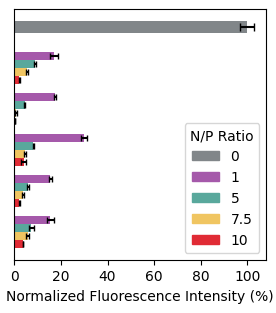

In [39]:
# Set the figure size
plt.figure(figsize=(3.25, 3.25))

# Separate 'pDNA' from the rest of the DataFrame
pDNA_df = df[df['Polymer'] == 'pDNA'].drop_duplicates(subset='Polymer')
rest_df = df[df['Polymer'] != 'pDNA']

# Reset poly_index for the 'pDNA'
poly_index = 0

# Plot 'pDNA' once if it exists in the DataFrame
if not pDNA_df.empty:
    mean_value = pDNA_df['Avg. %'].values[0]
    std_dev = pDNA_df['Final std'].values[0]
    # Set the height of the 'pDNA' bar to 0.4
    plt.barh(poly_index, mean_value, color=np_ratio_colors[str(pDNA_df['N/P ratio'].values[0])], height=0.3)
    plt.errorbar(x=mean_value, y=poly_index, xerr=std_dev, fmt='none', c='black', capsize=3)

# Increment the poly_index to plot the rest of the polymers below 'pDNA'
poly_index += 1

# Loop through each polymer excluding 'pDNA' to plot bars
for polymer in rest_df['Polymer'].unique():
    poly_df = rest_df[rest_df['Polymer'] == polymer]
    num_entries = len(poly_df['N/P ratio'].unique())

    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        # Calculate the y position for other bars, keeping them grouped together
        y = poly_index + (ratio_index - (num_entries - 1) / 2) * 0.2
        mean_value = group_df['Avg. %'].mean()
        std_dev = group_df['Final std'].mean()
        # Set the height of other bars to 0.2
        plt.barh(y, mean_value, color=np_ratio_colors[str(np_ratio)], height=0.2)
        plt.errorbar(x=mean_value, y=y, xerr=std_dev, fmt='none', c='black', capsize=2)

    poly_index += 1

plt.gca().invert_yaxis()
plt.tick_params(left=False)
plt.xlabel('Normalized Fluorescence Intensity (%)')
plt.yticks([])
plt.axvline(0, color='black', linewidth=0.5)

legend_handles = [mpatches.Patch(color=color, label=str(int(float(label))) if float(label).is_integer() else label)
                  for label, color in np_ratio_colors.items()]

plt.legend(handles=legend_handles, title='N/P Ratio')

plt.show()

/var/folders/dy/5pp8f0k5741b6sm60ch4xzhc0000gn/T/ipykernel_17365/1581883041.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels, fontsize=14)


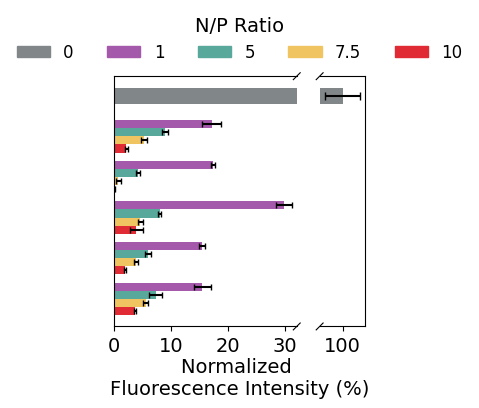

In [47]:
# Set the figure size
fig = plt.figure(figsize=(3.25, 3.25))
bax = brokenaxes(xlims=((0, 32), (96, 104)), hspace=.05, fig=fig, despine=False)

# Separate 'pDNA' from the rest of the DataFrame
pDNA_df = df[df['Polymer'] == 'pDNA'].drop_duplicates(subset='Polymer')
rest_df = df[df['Polymer'] != 'pDNA']

# Reset poly_index for the 'pDNA'
poly_index = 0

# Plot 'pDNA' once if it exists in the DataFrame
if not pDNA_df.empty:
    mean_value = pDNA_df['Avg. %'].values[0]
    std_dev = pDNA_df['Final std'].values[0]
    # Set the height of the 'pDNA' bar to 0.4
    bax.barh(poly_index, mean_value, color=np_ratio_colors[str(pDNA_df['N/P ratio'].values[0])], height=0.4)
    bax.errorbar(x=mean_value, y=poly_index, xerr=std_dev, fmt='none', c='black', capsize=3)

# Increment the poly_index to plot the rest of the polymers below 'pDNA'
poly_index += 1

# Loop through each polymer excluding 'pDNA' to plot bars
for polymer in rest_df['Polymer'].unique():
    poly_df = rest_df[rest_df['Polymer'] == polymer]
    num_entries = len(poly_df['N/P ratio'].unique())

    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        # Calculate the y position for other bars, keeping them grouped together
        y = poly_index + (ratio_index - (num_entries - 1) / 2) * 0.2
        mean_value = group_df['Avg. %'].mean()
        std_dev = group_df['Final std'].mean()
        # Set the height of other bars to 0.2
        bax.barh(y, mean_value, color=np_ratio_colors[str(np_ratio)], height=0.2)
        bax.errorbar(x=mean_value, y=y, xerr=std_dev, fmt='none', c='black', capsize=2)

    poly_index += 1

for ax in bax.axs:
    ax.tick_params(left=False) 
    ax.set_yticks([])
    ax.invert_yaxis()
    x_ticks_labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(x_ticks_labels, fontsize=14)


plt.xlabel('Normalized \nFluorescence Intensity (%)', labelpad=22, fontsize=14)

legend_handles = [mpatches.Patch(color=color, label=str(int(float(label))) if float(label).is_integer() else label)
                  for label, color in np_ratio_colors.items()]

num_legend_items = len(legend_handles)
plt.legend(handles=legend_handles, title='N/P Ratio', loc='upper center', 
           bbox_to_anchor=(0.5, 1.3), fontsize=12, title_fontsize=14, frameon=False, ncol=num_legend_items)


plt.show()